In [136]:
#imports
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
import matplotlib.pyplot as plt

import nba_api
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import playercareerstats, leaguegamefinder, playerdashboardbyclutch, playergamelogs, commonplayerinfo, teamplayeronoffdetails, teamgamelogs


In [139]:
class Team(object):
    def __init__(self, TeamID):
        
        self.TeamID =  TeamID 
        self.TeamName = teams.find_team_name_by_id(team_id=self.TeamID)['full_name']

        self.StartYear = 2009 #First year data is avalible
        self.LastYear = 2021 #Current year
        
        
        
        

        
    #Complile the Team Data
    def compile_active_team_data(self):
        

    
    
        team_season_point_average_raw_data = []
        team_points_raw_data = []
        opponent_season_point_average_raw_data = []
        opponent_season_points_raw_data = []
        
        team_season_FT_average_raw_data = []
        team_season_FG_average_raw_data = []
        team_season_FG3_average_raw_data = []
        opponent_season_FT_average_raw_data = []
        opponent_season_FG_average_raw_data = []
        opponent_season_FG3_average_raw_data = []
            
        
        print(self.StartYear, self.LastYear)
        for year in range((self.StartYear), (self.LastYear)):
            print("-------------------------------------------------")
            season = str(year) + "-" + str(((year+1)-2000))
            teamLogs = teamgamelogs.TeamGameLogs(team_id_nullable=self.TeamID, season_nullable=season)
            print(season)
            

            matchup_api_data = teamLogs.get_data_frames()[0]["MATCHUP"]
            team_season_points_api_data=teamLogs.get_data_frames()[0]["PTS"]
        

            print(teamLogs.get_data_frames()[0])


            team_season_points = []
            
            
            for game in range(0, len(teamLogs.get_data_frames()[0])):
        
                        
                    self.team_abbreviation = teams.find_team_name_by_id(team_id=self.TeamID)['abbreviation']
                    

                    try:   
                        
                        matchup_api_data[game] = matchup_api_data[game].replace(self.team_abbreviation, "")
                        
                    except:
                        print("Unexpected Error with removing player team")
                    try:
                        matchup_api_data[game] = matchup_api_data[game].replace(" @ ", "")
                        matchup_api_data[game] = matchup_api_data[game].replace(" vs. ", "")
                    except:
                        print("Error")
                    
                    
                    
                    
                    opponentAbbreviation = matchup_api_data[game]
                    
                    matchup_api_data[game] = matchup_api_data[game].replace('NOH', 'NOP')
                    matchup_api_data[game] = matchup_api_data[game].replace('NJN', 'BKN')
                    
                    opponentAbbreviation_for_search = matchup_api_data[game]
                                                                            
                    opponentID = int(teams.find_team_by_abbreviation(opponentAbbreviation_for_search)["id"])
                    if (game%10==0):
                        print(game)
                        
                    opponentLogs = teamgamelogs.TeamGameLogs(team_id_nullable=opponentID, season_nullable=season)
                    opponent_season_points_api_data = opponentLogs.get_data_frames()[0]['PTS']
                    
                    
                    team_points_raw_data.append(team_season_points_api_data[game])
                    team_season_points.append(team_season_points_api_data[game])
                    
                    past_games = teamLogs.get_data_frames()[0].head(game+1).copy()
                    #print("{} @ {}".format(self.team_abbreviation, opponentAbbreviation),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation))
                    #print(past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation)])]["FTM"].mean())
                    #print(past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation)])]["FGM"].mean())
                    #print(past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation)])]["FG3M"].mean())
                    team_season_FT_average_raw_data.append(past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation)])]["FTM"].mean())
                    team_season_FG_average_raw_data.append(past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation)])]["FGM"].mean())
                    team_season_FG3_average_raw_data.append(past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation)])]["FG3M"].mean())
                    
                    
                    if game == 0:
                        opponent_season_point_average_raw_data.append(opponent_season_points_api_data[game])
                        team_season_point_average_raw_data.append(teamLogs.get_data_frames()[0]["PTS"][game])
                        
                        
                    elif game<(len(opponentLogs.get_data_frames()[0]['PTS'])):
                        opponent_season_point_average_raw_data.append(opponent_season_points_api_data.head(game).mean())
                        team_season_point_average_raw_data.append((sum(team_season_points)/len(team_season_points)))
                                              
                        
                    else:
                        opponent_season_point_average_raw_data.append(opponent_season_points_api_data.mean())
                        team_season_point_average_raw_data.append((sum(team_season_points)/len(team_season_points)))
                    
                                            
                    time.sleep(1)
                    

        #Lengths of lists used for troublshooting
        print("the lengths")
        print(len(team_points_raw_data))
    
        print(len(team_season_point_average_raw_data))
        print(len(opponent_season_point_average_raw_data))
        print(len(team_season_FT_average_raw_data)) 
        print(len(team_season_FG_average_raw_data)) 
        print(len(team_season_FG3_average_raw_data)) 
        
       
        #adding the lists to the team data dictionary to be made into a dataframe
        team_data = {
        "Points Scored": team_points_raw_data,
        "Team Point Average" : team_season_point_average_raw_data,
        "Opponent Team Point Average": opponent_season_point_average_raw_data, 
        "Team Season FTM Average Specific": team_season_FT_average_raw_data,
        "Team Sesason FGM Average Specific": team_season_FG_average_raw_data,
        "Team Season FG3M Average Specific": team_season_FG3_average_raw_data,
        }

        team_dataFrame = pd.DataFrame(data=team_data)
        print(team_dataFrame) #print for troublshooting

        return(team_dataFrame)


       
    #Get the Team data for outside calls
    def get_active_team_data(self):
        return(self.compile_active_team_data())
    def compile_data_for_prediction(self, opponentAbbreviation_for_prediction):
      
        
        season = "2020-21"
        teamLogs = teamgamelogs.TeamGameLogs(team_id_nullable=self.TeamID, season_nullable=season)
        team_season_points_api_data = teamLogs.get_data_frames()[0]["PTS"]
       
        team_season_point_average = [team_season_points_api_data.mean()]
        
        
        opponentID = int(teams.find_team_by_abbreviation(opponentAbbreviation_for_prediction)["id"])
        opponentLogs = teamgamelogs.TeamGameLogs(team_id_nullable=opponentID, season_nullable=season)
        opponent_season_points_api_data = opponentLogs.get_data_frames()[0]["PTS"]
        opponent_season_point_average = [opponent_season_points_api_data.mean()]

        past_games = teamLogs.get_data_frames()[0].copy()
        team_season_FT_average = past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation_for_prediction),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation_for_prediction)])]["FTM"].mean()
        team_season_FG_average = past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation_for_prediction),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation_for_prediction)])]["FGM"].mean()
        team_season_FG3_average = past_games.loc[past_games['MATCHUP'].isin(["{} @ {}".format(self.team_abbreviation, opponentAbbreviation_for_prediction),"{} vs. {}".format(self.team_abbreviation, opponentAbbreviation_for_prediction)])]["FG3M"].mean()
        
        
        
        prediction_data = {
        "Team Point Average" : team_season_point_average,
        "Opponent Team Point Average": opponent_season_point_average, 
        "Team Season FTM Average Specific": team_season_FT_average,
        "Team Sesason FGM Average Specific": team_season_FG_average,
        "Team Season FG3M Average Specific": team_season_FG3_average
        }
        prediction_dataframe = pd.DataFrame(data=prediction_data)
        print(prediction_dataframe)
        return(prediction_dataframe)
        
    def get_data_for_prediction(self, opponentAbbreviation_for_prediction):
        return(self.compile_data_for_prediction(opponentAbbreviation_for_prediction))
        
    



In [126]:
team =Team(1610612752) 
test = team.get_active_team_data() 




    


print(test)

backup = test.copy()



2009 2021
-------------------------------------------------
2009-10
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2009-10  1610612752               NYK  New York Knicks  0020901226   
1      2009-10  1610612752               NYK  New York Knicks  0020901206   
2      2009-10  1610612752               NYK  New York Knicks  0020901199   
3      2009-10  1610612752               NYK  New York Knicks  0020901174   
4      2009-10  1610612752               NYK  New York Knicks  0020901158   
5      2009-10  1610612752               NYK  New York Knicks  0020901153   
6      2009-10  1610612752               NYK  New York Knicks  0020901148   
7      2009-10  1610612752               NYK  New York Knicks  0020901130   
8      2009-10  1610612752               NYK  New York Knicks  0020901118   
9      2009-10  1610612752               NYK  New York Knicks  0020901101   
10     2009-10  1610612752               NYK  New York Knicks  0020901081   
11     2

10
20
30
40
50
60
70
80
-------------------------------------------------
2010-11
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2010-11  1610612752               NYK  New York Knicks  0021001216   
1      2010-11  1610612752               NYK  New York Knicks  0021001213   
2      2010-11  1610612752               NYK  New York Knicks  0021001198   
3      2010-11  1610612752               NYK  New York Knicks  0021001177   
4      2010-11  1610612752               NYK  New York Knicks  0021001165   
5      2010-11  1610612752               NYK  New York Knicks  0021001155   
6      2010-11  1610612752               NYK  New York Knicks  0021001143   
7      2010-11  1610612752               NYK  New York Knicks  0021001111   
8      2010-11  1610612752               NYK  New York Knicks  0021000051   
9      2010-11  1610612752               NYK  New York Knicks  0021001082   
10     2010-11  1610612752               NYK  New York Knicks  00210010

10
20
30
40
50
60
70
80
-------------------------------------------------
2011-12
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2011-12  1610612752               NYK  New York Knicks  0021100982   
1      2011-12  1610612752               NYK  New York Knicks  0021100974   
2      2011-12  1610612752               NYK  New York Knicks  0021100951   
3      2011-12  1610612752               NYK  New York Knicks  0021100939   
4      2011-12  1610612752               NYK  New York Knicks  0021100921   
5      2011-12  1610612752               NYK  New York Knicks  0021100915   
6      2011-12  1610612752               NYK  New York Knicks  0021100893   
7      2011-12  1610612752               NYK  New York Knicks  0021100878   
8      2011-12  1610612752               NYK  New York Knicks  0021100861   
9      2011-12  1610612752               NYK  New York Knicks  0021100857   
10     2011-12  1610612752               NYK  New York Knicks  00211008

10
20
30
40
50
60
-------------------------------------------------
2012-13
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2012-13  1610612752               NYK  New York Knicks  0021201218   
1      2012-13  1610612752               NYK  New York Knicks  0021201202   
2      2012-13  1610612752               NYK  New York Knicks  0021201196   
3      2012-13  1610612752               NYK  New York Knicks  0021201182   
4      2012-13  1610612752               NYK  New York Knicks  0021201174   
5      2012-13  1610612752               NYK  New York Knicks  0021201156   
6      2012-13  1610612752               NYK  New York Knicks  0021201145   
7      2012-13  1610612752               NYK  New York Knicks  0021201128   
8      2012-13  1610612752               NYK  New York Knicks  0021201113   
9      2012-13  1610612752               NYK  New York Knicks  0021201109   
10     2012-13  1610612752               NYK  New York Knicks  0021201099   


10
20
30
40
50
60
70
80
-------------------------------------------------
2013-14
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2013-14  1610612752               NYK  New York Knicks  0021301226   
1      2013-14  1610612752               NYK  New York Knicks  0021301214   
2      2013-14  1610612752               NYK  New York Knicks  0021301197   
3      2013-14  1610612752               NYK  New York Knicks  0021301177   
4      2013-14  1610612752               NYK  New York Knicks  0021301149   
5      2013-14  1610612752               NYK  New York Knicks  0021301136   
6      2013-14  1610612752               NYK  New York Knicks  0021301115   
7      2013-14  1610612752               NYK  New York Knicks  0021301110   
8      2013-14  1610612752               NYK  New York Knicks  0021301098   
9      2013-14  1610612752               NYK  New York Knicks  0021301085   
10     2013-14  1610612752               NYK  New York Knicks  00213010

10
20
30
40
50
60
70
80
-------------------------------------------------
2014-15
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2014-15  1610612752               NYK  New York Knicks  0021401226   
1      2014-15  1610612752               NYK  New York Knicks  0021401205   
2      2014-15  1610612752               NYK  New York Knicks  0021401187   
3      2014-15  1610612752               NYK  New York Knicks  0021401180   
4      2014-15  1610612752               NYK  New York Knicks  0021401165   
5      2014-15  1610612752               NYK  New York Knicks  0021401151   
6      2014-15  1610612752               NYK  New York Knicks  0021401128   
7      2014-15  1610612752               NYK  New York Knicks  0021401116   
8      2014-15  1610612752               NYK  New York Knicks  0021401088   
9      2014-15  1610612752               NYK  New York Knicks  0021401079   
10     2014-15  1610612752               NYK  New York Knicks  00214010

10
20
30
40
50
60
70
80
-------------------------------------------------
2015-16
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2015-16  1610612752               NYK  New York Knicks  0021501212   
1      2015-16  1610612752               NYK  New York Knicks  0021501202   
2      2015-16  1610612752               NYK  New York Knicks  0021501180   
3      2015-16  1610612752               NYK  New York Knicks  0021501169   
4      2015-16  1610612752               NYK  New York Knicks  0021501151   
5      2015-16  1610612752               NYK  New York Knicks  0021501130   
6      2015-16  1610612752               NYK  New York Knicks  0021501117   
7      2015-16  1610612752               NYK  New York Knicks  0021501102   
8      2015-16  1610612752               NYK  New York Knicks  0021501086   
9      2015-16  1610612752               NYK  New York Knicks  0021501070   
10     2015-16  1610612752               NYK  New York Knicks  00215010

10
20
30
40
50
60
70
80
-------------------------------------------------
2016-17
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2016-17  1610612752               NYK  New York Knicks  0021601220   
1      2016-17  1610612752               NYK  New York Knicks  0021601196   
2      2016-17  1610612752               NYK  New York Knicks  0021601181   
3      2016-17  1610612752               NYK  New York Knicks  0021601176   
4      2016-17  1610612752               NYK  New York Knicks  0021601160   
5      2016-17  1610612752               NYK  New York Knicks  0021601145   
6      2016-17  1610612752               NYK  New York Knicks  0021601133   
7      2016-17  1610612752               NYK  New York Knicks  0021601115   
8      2016-17  1610612752               NYK  New York Knicks  0021601098   
9      2016-17  1610612752               NYK  New York Knicks  0021601085   
10     2016-17  1610612752               NYK  New York Knicks  00216010

10
20
30
40
50
60
70
80
-------------------------------------------------
2017-18
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2017-18  1610612752               NYK  New York Knicks  0021701220   
1      2017-18  1610612752               NYK  New York Knicks  0021701207   
2      2017-18  1610612752               NYK  New York Knicks  0021701192   
3      2017-18  1610612752               NYK  New York Knicks  0021701186   
4      2017-18  1610612752               NYK  New York Knicks  0021701159   
5      2017-18  1610612752               NYK  New York Knicks  0021701139   
6      2017-18  1610612752               NYK  New York Knicks  0021701118   
7      2017-18  1610612752               NYK  New York Knicks  0021701103   
8      2017-18  1610612752               NYK  New York Knicks  0021701098   
9      2017-18  1610612752               NYK  New York Knicks  0021701081   
10     2017-18  1610612752               NYK  New York Knicks  00217010

10
20
30
40
50
60
70
80
-------------------------------------------------
2018-19
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2018-19  1610612752               NYK  New York Knicks  0021801223   
1      2018-19  1610612752               NYK  New York Knicks  0021801213   
2      2018-19  1610612752               NYK  New York Knicks  0021801204   
3      2018-19  1610612752               NYK  New York Knicks  0021801184   
4      2018-19  1610612752               NYK  New York Knicks  0021801166   
5      2018-19  1610612752               NYK  New York Knicks  0021801155   
6      2018-19  1610612752               NYK  New York Knicks  0021801141   
7      2018-19  1610612752               NYK  New York Knicks  0021801125   
8      2018-19  1610612752               NYK  New York Knicks  0021801095   
9      2018-19  1610612752               NYK  New York Knicks  0021801082   
10     2018-19  1610612752               NYK  New York Knicks  00218010

10
20
30
40
50
60
70
80
-------------------------------------------------
2019-20
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2019-20  1610612752               NYK  New York Knicks  0021900969   
1      2019-20  1610612752               NYK  New York Knicks  0021900961   
2      2019-20  1610612752               NYK  New York Knicks  0021900955   
3      2019-20  1610612752               NYK  New York Knicks  0021900932   
4      2019-20  1610612752               NYK  New York Knicks  0021900921   
5      2019-20  1610612752               NYK  New York Knicks  0021900903   
6      2019-20  1610612752               NYK  New York Knicks  0021900887   
7      2019-20  1610612752               NYK  New York Knicks  0021900873   
8      2019-20  1610612752               NYK  New York Knicks  0021900864   
9      2019-20  1610612752               NYK  New York Knicks  0021900853   
10     2019-20  1610612752               NYK  New York Knicks  00219008

10
20
30
40
50
60
-------------------------------------------------
2020-21
   SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0      2020-21  1610612752               NYK  New York Knicks  0022000627   
1      2020-21  1610612752               NYK  New York Knicks  0022000611   
2      2020-21  1610612752               NYK  New York Knicks  0022000604   
3      2020-21  1610612752               NYK  New York Knicks  0022000586   
4      2020-21  1610612752               NYK  New York Knicks  0022000573   
5      2020-21  1610612752               NYK  New York Knicks  0022000565   
6      2020-21  1610612752               NYK  New York Knicks  0022000541   
7      2020-21  1610612752               NYK  New York Knicks  0022000521   
8      2020-21  1610612752               NYK  New York Knicks  0022000515   
9      2020-21  1610612752               NYK  New York Knicks  0022000500   
10     2020-21  1610612752               NYK  New York Knicks  0022000483   


10
20
30
40
the lengths
912
912
912
912
912
912
     Points Scored  Team Point Average  Opponent Team Point Average  \
0              113          113.000000                   131.000000   
1              114          113.500000                    98.000000   
2               98          108.333333                   100.500000   
3              103          107.000000                   113.666667   
4              105          106.600000                   106.500000   
5              104          106.166667                   100.800000   
6              113          107.142857                    99.000000   
7              117          108.375000                   109.000000   
8               90          106.333333                    98.500000   
9               98          105.500000                   107.222222   
10              96          104.636364                   108.700000   
11             109          105.000000                    99.818182   
12             112          1

In [127]:
class Prediction(object):
    
    def __init__(self, data):
        self.data = data.copy()
        
    def sigmoid(self, dataframe):
        
        return((dataframe - self.train_stats['mean'])/self.train_stats['std'])
        #Defining the model
    def build_model(self):
        #below comented out portion is another model under testing
        
        input_layer=tf.keras.layers.Input(([len(self.train_dataset.keys())]))
        densel_layer = tf.keras.layers.Dense(units=1, input_shape=([len(self.train_dataset.keys())],))
        output = densel_layer(input_layer)
        model = tf.keras.Model(inputs=input_layer,outputs=output)

        model.compile(loss="mse",optimizer=tf.keras.optimizers.Adam(0.01), metrics=['mae', 'mse'])

        '''
        
        print([len(self.train_dataset.keys())])
        model = keras.Sequential([

            layers.Dense(32, activation='relu', input_shape=[len(self.train_dataset.keys())]),
            #layers.Dropout(0.05),
            #layers.Dense(128, activation=tf.nn.relu),
            layers.Dense(16, activation='relu'),
            layers.Dense(25),
            #layers.Dense(32, activation=tf.nn.relu),
            #layers.Dropout(0.05),
            #layers.Dense(32, activation=tf.nn.relu),
            #layers.Dense(8, activation='linear'),
            layers.Dense(1)
        ])

        #optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.00009)
        
        model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae', 'mse'])
        
        '''
        return model
        
    def test_prediction_accuracy(self):
        self.train_dataset = self.data.sample(frac=0.90, random_state=0)
        self.test_dataset = self.data.drop(self.train_dataset.index)
    
        self.train_labels = self.train_dataset.pop("Points Scored")
        self.test_labels = self.test_dataset.pop("Points Scored")
        
        self.train_stats = self.train_dataset.describe()
        #self.train_stats.pop("Points Scored")
        self.train_stats = self.train_stats.transpose()
        
        normed_train_data = self.sigmoid(self.train_dataset)
        normed_test_data = self.sigmoid(self.test_dataset)

        model = self.build_model()
        model.summary()
        example_batch = normed_train_data
        print((example_batch.keys()))
        example_result = model.predict(example_batch)
        example_result

        EPOCHS = 1000
        early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
        history = model.fit(normed_train_data, self.train_labels, epochs=EPOCHS, callbacks=[early_stop])

        loss, mae, mse = model.evaluate(normed_test_data, self.test_labels, verbose=0)

        print("Testing set Mean Abs Error: {:5.2f} Points Scored".format(mae))
        #make predictions and then plot them in realation to the actual values
        test_predictions = model.predict(normed_test_data).flatten()

        plt.scatter(self.test_labels, test_predictions)
        plt.xlabel("True Values [Points Scored]")
        plt.ylabel("Predictions [Points Scored]")
        plt.axis('equal')
        plt.axis('square')
        plt.xlim([60, plt.ylim()[1]])
        plt.ylim([60, plt.ylim()[1]])
        _ = plt.plot([-100,200], [-100, 200])

        print(self.test_labels)
        print(test_predictions)
    def make_prediction(self, prediction_circumstances):
        self.train_dataset = self.data.copy()
        print(self.data)
        self.train_labels = self.train_dataset.pop("Points Scored")
        
        self.train_stats = self.train_dataset.describe()
        #self.train_stats.pop("Points Scored")
        self.train_stats = self.train_stats.transpose()
        
        normed_train_data = self.sigmoid(self.train_dataset)
        normed_prediction_data = self.sigmoid(prediction_circumstances)
        model = self.build_model()
        model.summary()
        
        #following not nessicary
        example_batch = normed_train_data
        print((example_batch.keys()))
        example_result = model.predict(example_batch)
        example_result
        
        EPOCHS = 1000
        early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
        history = model.fit(normed_train_data, self.train_labels, epochs=EPOCHS, callbacks=[early_stop])
        
        prediction = model.predict(normed_prediction_data).flatten()
        print(prediction)
        return(prediction)

     Points Scored  Team Point Average  Opponent Team Point Average  \
0              113          113.000000                   131.000000   
1              114          113.500000                    98.000000   
2               98          108.333333                   100.500000   
3              103          107.000000                   113.666667   
4              105          106.600000                   106.500000   
5              104          106.166667                   100.800000   
6              113          107.142857                    99.000000   
7              117          108.375000                   109.000000   
8               90          106.333333                    98.500000   
9               98          105.500000                   107.222222   
10              96          104.636364                   108.700000   
11             109          105.000000                    99.818182   
12             112          105.538462                   106.333333   
13    

26/26 [==============================] - 0s 711us/step - loss: 10555.6772 - mae: 101.9265 - mse: 10555.6772
Epoch 2/1000
26/26 [==============================] - 0s 779us/step - loss: 10501.3206 - mae: 101.6981 - mse: 10501.3206
Epoch 3/1000
26/26 [==============================] - 0s 776us/step - loss: 10558.2972 - mae: 102.0053 - mse: 10558.2972
Epoch 4/1000
26/26 [==============================] - 0s 668us/step - loss: 10457.9139 - mae: 101.5438 - mse: 10457.9139
Epoch 5/1000
26/26 [==============================] - 0s 689us/step - loss: 10328.5041 - mae: 100.8881 - mse: 10328.5041
Epoch 6/1000
26/26 [==============================] - 0s 706us/step - loss: 10260.4518 - mae: 100.6129 - mse: 10260.4518
Epoch 7/1000
26/26 [==============================] - 0s 776us/step - loss: 10138.6914 - mae: 100.0139 - mse: 10138.6914
Epoch 8/1000
26/26 [==============================] - 0s 751us/step - loss: 10112.3171 - mae: 99.9384 - mse: 10112.3171
Epoch 9/1000
26/26 [==========================

26/26 [==============================] - 0s 708us/step - loss: 7214.7157 - mae: 84.5634 - mse: 7214.7157
Epoch 70/1000
26/26 [==============================] - 0s 721us/step - loss: 7181.5915 - mae: 84.4369 - mse: 7181.5915
Epoch 71/1000
26/26 [==============================] - 0s 635us/step - loss: 7126.1738 - mae: 84.0998 - mse: 7126.1738
Epoch 72/1000
26/26 [==============================] - 0s 769us/step - loss: 7108.2702 - mae: 83.9638 - mse: 7108.2702
Epoch 73/1000
26/26 [==============================] - 0s 736us/step - loss: 7058.4042 - mae: 83.6676 - mse: 7058.4042
Epoch 74/1000
26/26 [==============================] - 0s 710us/step - loss: 7077.2168 - mae: 83.8051 - mse: 7077.2168
Epoch 75/1000
26/26 [==============================] - 0s 788us/step - loss: 6947.0532 - mae: 83.0328 - mse: 6947.0532
Epoch 76/1000
26/26 [==============================] - 0s 677us/step - loss: 6924.8084 - mae: 82.8987 - mse: 6924.8084
Epoch 77/1000
26/26 [==============================] - 0s 700u

26/26 [==============================] - 0s 750us/step - loss: 4776.0367 - mae: 68.7551 - mse: 4776.0367
Epoch 138/1000
26/26 [==============================] - 0s 696us/step - loss: 4694.8744 - mae: 68.2002 - mse: 4694.8744
Epoch 139/1000
26/26 [==============================] - 0s 711us/step - loss: 4635.4198 - mae: 67.7260 - mse: 4635.4198
Epoch 140/1000
26/26 [==============================] - 0s 788us/step - loss: 4608.1420 - mae: 67.5867 - mse: 4608.1420
Epoch 141/1000
26/26 [==============================] - 0s 731us/step - loss: 4599.1988 - mae: 67.4801 - mse: 4599.1988
Epoch 142/1000
26/26 [==============================] - 0s 709us/step - loss: 4564.5871 - mae: 67.2360 - mse: 4564.5871
Epoch 143/1000
26/26 [==============================] - 0s 717us/step - loss: 4530.6693 - mae: 66.9681 - mse: 4530.6693
Epoch 144/1000
26/26 [==============================] - 0s 746us/step - loss: 4538.3685 - mae: 67.0051 - mse: 4538.3685
Epoch 145/1000
26/26 [==============================] -

26/26 [==============================] - 0s 798us/step - loss: 2844.0047 - mae: 52.9187 - mse: 2844.0047
Epoch 206/1000
26/26 [==============================] - 0s 2ms/step - loss: 2821.3609 - mae: 52.7354 - mse: 2821.3609
Epoch 207/1000
26/26 [==============================] - 0s 758us/step - loss: 2767.6624 - mae: 52.1904 - mse: 2767.6624
Epoch 208/1000
26/26 [==============================] - 0s 845us/step - loss: 2772.8787 - mae: 52.2721 - mse: 2772.8787
Epoch 209/1000
26/26 [==============================] - 0s 758us/step - loss: 2776.1326 - mae: 52.2869 - mse: 2776.1326
Epoch 210/1000
26/26 [==============================] - 0s 798us/step - loss: 2742.2025 - mae: 51.9671 - mse: 2742.2025
Epoch 211/1000
26/26 [==============================] - 0s 758us/step - loss: 2703.2952 - mae: 51.5775 - mse: 2703.2952
Epoch 212/1000
26/26 [==============================] - 0s 798us/step - loss: 2721.6906 - mae: 51.7691 - mse: 2721.6906
Epoch 213/1000
26/26 [==============================] - 0

26/26 [==============================] - 0s 834us/step - loss: 1512.0934 - mae: 38.3634 - mse: 1512.0934
Epoch 274/1000
26/26 [==============================] - 0s 711us/step - loss: 1511.9107 - mae: 38.2942 - mse: 1511.9107
Epoch 275/1000
26/26 [==============================] - 0s 735us/step - loss: 1476.9491 - mae: 37.8396 - mse: 1476.9491
Epoch 276/1000
26/26 [==============================] - 0s 725us/step - loss: 1455.1593 - mae: 37.5852 - mse: 1455.1593
Epoch 277/1000
26/26 [==============================] - 0s 757us/step - loss: 1464.4850 - mae: 37.6337 - mse: 1464.4850
Epoch 278/1000
26/26 [==============================] - 0s 723us/step - loss: 1461.0849 - mae: 37.5695 - mse: 1461.0849
Epoch 279/1000
26/26 [==============================] - 0s 783us/step - loss: 1415.4007 - mae: 37.0500 - mse: 1415.4007
Epoch 280/1000
26/26 [==============================] - 0s 795us/step - loss: 1399.8983 - mae: 36.7836 - mse: 1399.8983
Epoch 281/1000
26/26 [==============================] -

Epoch 342/1000
26/26 [==============================] - 0s 680us/step - loss: 634.8029 - mae: 24.3192 - mse: 634.8029
Epoch 343/1000
26/26 [==============================] - 0s 746us/step - loss: 621.4307 - mae: 24.0216 - mse: 621.4307
Epoch 344/1000
26/26 [==============================] - 0s 937us/step - loss: 626.6015 - mae: 24.1323 - mse: 626.6015
Epoch 345/1000
26/26 [==============================] - 0s 731us/step - loss: 615.2115 - mae: 23.9741 - mse: 615.2115
Epoch 346/1000
26/26 [==============================] - 0s 688us/step - loss: 608.2276 - mae: 23.7418 - mse: 608.2276
Epoch 347/1000
26/26 [==============================] - 0s 733us/step - loss: 606.0404 - mae: 23.6940 - mse: 606.0404
Epoch 348/1000
26/26 [==============================] - 0s 658us/step - loss: 580.4791 - mae: 23.1763 - mse: 580.4791
Epoch 349/1000
26/26 [==============================] - 0s 721us/step - loss: 589.4316 - mae: 23.3938 - mse: 589.4316
Epoch 350/1000
26/26 [==============================] - 

26/26 [==============================] - 0s 766us/step - loss: 196.0813 - mae: 12.6568 - mse: 196.0813
Epoch 412/1000
26/26 [==============================] - 0s 758us/step - loss: 191.3004 - mae: 12.6464 - mse: 191.3004
Epoch 413/1000
26/26 [==============================] - 0s 791us/step - loss: 179.0958 - mae: 12.0613 - mse: 179.0958
Epoch 414/1000
26/26 [==============================] - 0s 713us/step - loss: 175.1932 - mae: 11.9728 - mse: 175.1932
Epoch 415/1000
26/26 [==============================] - 0s 732us/step - loss: 177.1348 - mae: 12.0345 - mse: 177.1348
Epoch 416/1000
26/26 [==============================] - 0s 757us/step - loss: 181.4499 - mae: 12.0839 - mse: 181.4499
Epoch 417/1000
26/26 [==============================] - 0s 759us/step - loss: 178.1475 - mae: 11.8994 - mse: 178.1475
Epoch 418/1000
26/26 [==============================] - 0s 783us/step - loss: 165.0093 - mae: 11.5226 - mse: 165.0093
Epoch 419/1000
26/26 [==============================] - 0s 764us/step -

26/26 [==============================] - 0s 721us/step - loss: 53.4659 - mae: 5.6587 - mse: 53.4659
Epoch 482/1000
26/26 [==============================] - 0s 733us/step - loss: 54.7238 - mae: 5.6214 - mse: 54.7238
Epoch 483/1000
26/26 [==============================] - 0s 749us/step - loss: 51.1145 - mae: 5.4646 - mse: 51.1145
Epoch 484/1000
26/26 [==============================] - 0s 741us/step - loss: 51.6338 - mae: 5.4284 - mse: 51.6338
Epoch 485/1000
26/26 [==============================] - 0s 741us/step - loss: 51.0892 - mae: 5.3939 - mse: 51.0892
Epoch 486/1000
26/26 [==============================] - 0s 833us/step - loss: 51.9121 - mae: 5.4710 - mse: 51.9121
Epoch 487/1000
26/26 [==============================] - 0s 734us/step - loss: 51.6047 - mae: 5.4962 - mse: 51.6047
Epoch 488/1000
26/26 [==============================] - 0s 714us/step - loss: 54.2546 - mae: 5.5216 - mse: 54.2546
Epoch 489/1000
26/26 [==============================] - 0s 763us/step - loss: 52.5844 - mae: 5.

26/26 [==============================] - 0s 738us/step - loss: 48.2331 - mae: 4.4468 - mse: 48.2331
Epoch 553/1000
26/26 [==============================] - 0s 730us/step - loss: 46.8573 - mae: 4.5535 - mse: 46.8573
Epoch 554/1000
26/26 [==============================] - 0s 763us/step - loss: 38.9796 - mae: 3.9266 - mse: 38.9796
Epoch 555/1000
26/26 [==============================] - 0s 750us/step - loss: 47.8075 - mae: 4.3993 - mse: 47.8075
Epoch 556/1000
26/26 [==============================] - 0s 840us/step - loss: 52.3352 - mae: 4.5937 - mse: 52.3352
Epoch 557/1000
26/26 [==============================] - 0s 686us/step - loss: 46.5883 - mae: 4.3552 - mse: 46.5883
Epoch 558/1000
26/26 [==============================] - 0s 668us/step - loss: 37.7227 - mae: 3.9433 - mse: 37.7227
Epoch 559/1000
26/26 [==============================] - 0s 695us/step - loss: 45.5006 - mae: 4.3095 - mse: 45.5006
Epoch 560/1000
26/26 [==============================] - 0s 749us/step - loss: 43.9076 - mae: 4.

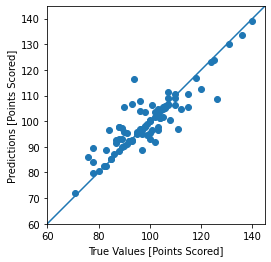

In [128]:
print(test)
prediction_test = Prediction(test)

prediction_test.test_prediction_accuracy()


In [141]:

team =Team(1610612752) 
prediction_data = team.get_data_for_prediction("ORL")

print(prediction_data)
rohan = prediction_test.make_prediction(prediction_data)
print("The predicted score is", rohan)


   Team Point Average  Opponent Team Point Average  \
0          104.833333                   104.707317   

   Team Season FTM Average Specific  Team Sesason FGM Average Specific  \
0                         15.333333                          33.666667   

   Team Season FG3M Average Specific  
0                           8.666667  
   Team Point Average  Opponent Team Point Average  \
0          104.833333                   104.707317   

   Team Season FTM Average Specific  Team Sesason FGM Average Specific  \
0                         15.333333                          33.666667   

   Team Season FG3M Average Specific  
0                           8.666667  
     Points Scored  Team Point Average  Opponent Team Point Average  \
0              113          113.000000                   131.000000   
1              114          113.500000                    98.000000   
2               98          108.333333                   100.500000   
3              103          107.000000      

29/29 [==============================] - 0s 654us/step - loss: 10304.2667 - mae: 100.7130 - mse: 10304.2667
Epoch 2/1000
29/29 [==============================] - 0s 752us/step - loss: 10260.6982 - mae: 100.5504 - mse: 10260.6982
Epoch 3/1000
29/29 [==============================] - 0s 627us/step - loss: 10370.8905 - mae: 101.1229 - mse: 10370.8905
Epoch 4/1000
29/29 [==============================] - 0s 637us/step - loss: 10223.8962 - mae: 100.4702 - mse: 10223.8962
Epoch 5/1000
29/29 [==============================] - 0s 687us/step - loss: 10186.4640 - mae: 100.2551 - mse: 10186.4640
Epoch 6/1000
29/29 [==============================] - 0s 681us/step - loss: 10051.2204 - mae: 99.6369 - mse: 10051.2204
Epoch 7/1000
29/29 [==============================] - 0s 639us/step - loss: 10000.8139 - mae: 99.3611 - mse: 10000.8139
Epoch 8/1000
29/29 [==============================] - 0s 642us/step - loss: 9979.0891 - mae: 99.2928 - mse: 9979.0891
Epoch 9/1000
29/29 [==============================

29/29 [==============================] - 0s 702us/step - loss: 6792.4818 - mae: 82.0618 - mse: 6792.4818
Epoch 70/1000
29/29 [==============================] - 0s 678us/step - loss: 6848.2436 - mae: 82.3919 - mse: 6848.2436
Epoch 71/1000
29/29 [==============================] - 0s 606us/step - loss: 6762.8387 - mae: 81.9029 - mse: 6762.8387
Epoch 72/1000
29/29 [==============================] - 0s 781us/step - loss: 6764.0368 - mae: 81.9141 - mse: 6764.0368
Epoch 73/1000
29/29 [==============================] - 0s 707us/step - loss: 6690.0953 - mae: 81.4361 - mse: 6690.0953
Epoch 74/1000
29/29 [==============================] - 0s 681us/step - loss: 6609.8626 - mae: 80.9918 - mse: 6609.8626
Epoch 75/1000
29/29 [==============================] - 0s 891us/step - loss: 6578.1476 - mae: 80.7768 - mse: 6578.1476
Epoch 76/1000
29/29 [==============================] - 0s 926us/step - loss: 6512.2349 - mae: 80.3470 - mse: 6512.2349
Epoch 77/1000
29/29 [==============================] - 0s 728u

29/29 [==============================] - 0s 854us/step - loss: 4282.7723 - mae: 65.0861 - mse: 4282.7723
Epoch 138/1000
29/29 [==============================] - 0s 868us/step - loss: 4186.4306 - mae: 64.3378 - mse: 4186.4306
Epoch 139/1000
29/29 [==============================] - 0s 654us/step - loss: 4149.6995 - mae: 64.0525 - mse: 4149.6995
Epoch 140/1000
29/29 [==============================] - 0s 753us/step - loss: 4138.3977 - mae: 63.9611 - mse: 4138.3977
Epoch 141/1000
29/29 [==============================] - 0s 794us/step - loss: 4067.4435 - mae: 63.3669 - mse: 4067.4435
Epoch 142/1000
29/29 [==============================] - 0s 748us/step - loss: 4036.1753 - mae: 63.2003 - mse: 4036.1753
Epoch 143/1000
29/29 [==============================] - 0s 672us/step - loss: 4015.3755 - mae: 63.0135 - mse: 4015.3755
Epoch 144/1000
29/29 [==============================] - 0s 819us/step - loss: 3981.5161 - mae: 62.7508 - mse: 3981.5161
Epoch 145/1000
29/29 [==============================] -

29/29 [==============================] - 0s 713us/step - loss: 2297.0296 - mae: 47.4481 - mse: 2297.0296
Epoch 206/1000
29/29 [==============================] - 0s 677us/step - loss: 2277.3509 - mae: 47.2599 - mse: 2277.3509
Epoch 207/1000
29/29 [==============================] - 0s 747us/step - loss: 2287.1974 - mae: 47.3507 - mse: 2287.1974
Epoch 208/1000
29/29 [==============================] - 0s 855us/step - loss: 2260.7963 - mae: 47.0995 - mse: 2260.7963
Epoch 209/1000
29/29 [==============================] - 0s 689us/step - loss: 2230.2421 - mae: 46.7248 - mse: 2230.2421
Epoch 210/1000
29/29 [==============================] - 0s 665us/step - loss: 2197.3619 - mae: 46.4247 - mse: 2197.3619
Epoch 211/1000
29/29 [==============================] - 0s 645us/step - loss: 2138.0155 - mae: 45.7843 - mse: 2138.0155
Epoch 212/1000
29/29 [==============================] - 0s 749us/step - loss: 2141.9509 - mae: 45.8174 - mse: 2141.9509
Epoch 213/1000
29/29 [==============================] -

29/29 [==============================] - 0s 677us/step - loss: 1030.2028 - mae: 31.4230 - mse: 1030.2028
Epoch 274/1000
29/29 [==============================] - 0s 712us/step - loss: 1021.9486 - mae: 31.2461 - mse: 1021.9486
Epoch 275/1000
29/29 [==============================] - 0s 819us/step - loss: 1007.9265 - mae: 31.0463 - mse: 1007.9265
Epoch 276/1000
29/29 [==============================] - 0s 855us/step - loss: 983.1628 - mae: 30.6334 - mse: 983.1628
Epoch 277/1000
29/29 [==============================] - 0s 785us/step - loss: 996.2351 - mae: 30.8502 - mse: 996.2351
Epoch 278/1000
29/29 [==============================] - 0s 926us/step - loss: 961.1191 - mae: 30.2626 - mse: 961.1191
Epoch 279/1000
29/29 [==============================] - 0s 854us/step - loss: 960.2069 - mae: 30.3114 - mse: 960.2069
Epoch 280/1000
29/29 [==============================] - 0s 677us/step - loss: 948.0986 - mae: 30.0308 - mse: 948.0986
Epoch 281/1000
29/29 [==============================] - 0s 677us/

29/29 [==============================] - 0s 1ms/step - loss: 332.4802 - mae: 17.1299 - mse: 332.4802
Epoch 343/1000
29/29 [==============================] - 0s 939us/step - loss: 321.1840 - mae: 16.8160 - mse: 321.1840
Epoch 344/1000
29/29 [==============================] - 0s 884us/step - loss: 321.5795 - mae: 16.8984 - mse: 321.5795
Epoch 345/1000
29/29 [==============================] - 0s 930us/step - loss: 315.5939 - mae: 16.5872 - mse: 315.5939
Epoch 346/1000
29/29 [==============================] - 0s 878us/step - loss: 299.7886 - mae: 16.0869 - mse: 299.7886
Epoch 347/1000
29/29 [==============================] - 0s 870us/step - loss: 298.2927 - mae: 16.0936 - mse: 298.2927
Epoch 348/1000
29/29 [==============================] - 0s 903us/step - loss: 297.9740 - mae: 16.0402 - mse: 297.9740
Epoch 349/1000
29/29 [==============================] - 0s 918us/step - loss: 288.6327 - mae: 15.8844 - mse: 288.6327
Epoch 350/1000
29/29 [==============================] - 0s 914us/step - l

29/29 [==============================] - 0s 926us/step - loss: 71.6048 - mae: 6.8891 - mse: 71.6048
Epoch 413/1000
29/29 [==============================] - 0s 947us/step - loss: 73.4021 - mae: 7.0383 - mse: 73.4021
Epoch 414/1000
29/29 [==============================] - 0s 905us/step - loss: 71.4384 - mae: 6.7715 - mse: 71.4384
Epoch 415/1000
29/29 [==============================] - 0s 926us/step - loss: 65.0377 - mae: 6.6048 - mse: 65.0377
Epoch 416/1000
29/29 [==============================] - 0s 972us/step - loss: 71.1843 - mae: 6.7883 - mse: 71.1843
Epoch 417/1000
29/29 [==============================] - 0s 918us/step - loss: 74.1853 - mae: 6.8395 - mse: 74.1853
Epoch 418/1000
29/29 [==============================] - 0s 858us/step - loss: 60.3901 - mae: 6.4627 - mse: 60.3901
Epoch 419/1000
29/29 [==============================] - 0s 966us/step - loss: 71.8486 - mae: 6.7677 - mse: 71.8486
Epoch 420/1000
29/29 [==============================] - 0s 935us/step - loss: 68.0629 - mae: 6.

29/29 [==============================] - 0s 900us/step - loss: 43.0290 - mae: 4.2678 - mse: 43.0290
Epoch 484/1000
29/29 [==============================] - 0s 992us/step - loss: 42.1902 - mae: 4.1556 - mse: 42.1902
Epoch 485/1000
29/29 [==============================] - 0s 922us/step - loss: 43.7059 - mae: 4.2974 - mse: 43.7059
Epoch 486/1000
29/29 [==============================] - 0s 879us/step - loss: 39.9709 - mae: 4.0785 - mse: 39.9709
Epoch 487/1000
29/29 [==============================] - 0s 907us/step - loss: 43.0155 - mae: 4.1878 - mse: 43.0155
Epoch 488/1000
29/29 [==============================] - 0s 873us/step - loss: 46.7258 - mae: 4.3997 - mse: 46.7258
Epoch 489/1000
29/29 [==============================] - 0s 865us/step - loss: 43.8105 - mae: 4.2438 - mse: 43.8105
Epoch 490/1000
29/29 [==============================] - 0s 851us/step - loss: 42.4974 - mae: 4.1674 - mse: 42.4974
Epoch 491/1000
29/29 [==============================] - 0s 907us/step - loss: 38.4793 - mae: 3.